# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**
>在模拟过程中，智能出租车究竟移动了吗？

智能出租车在模拟过程中，根本就没动过。  
 
>驾驶代理程序获得了什么样的奖励？

驾驶代理程序在模拟中收到正面和负面的回报。 
    
>交通灯的颜色改变是如何影响奖励的？

当有红灯时，会给予积极的奖励。因为在红灯处智能出租车预计不会移动，智能出租车停留在位置上，没有移动。 当有绿灯时，会得到惩罚。因为在绿灯时候，智能出租车预计会移动，但智能出租车没有移动，因此受到惩罚。



### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**

>在agent.py Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。

* display - 如果需要图形界面，请设成“True”；不需要图形界面设置成“false”。条件是“PyGame”一定要安装成

* enforce_deadline - 如果要求代理程序在要求时间内结束，请设置为“True”。代理程序如果在规定时间内不结束，就会被惩罚。相反则会得到奖励。

* update_delay - 控制两个行动之间的时间间隔，默认值是两秒。


>在environment.py Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？

当代理程序执行一个行动时，调用‘act’函数。


>在simulator.py Python 文件里，'render_text()'函数和'render()'函数之间的区别是什么?

'render_text()'函数是不使用图形化界面，它通过终端显示运行的结果。'render()'函数则会显示图形化界面。

>在planner.py Python文件里，'next_waypoint()'函数会先考虑南北方向还是东西方向?

'next_waypoint()' 函数会先考虑东西方向。

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

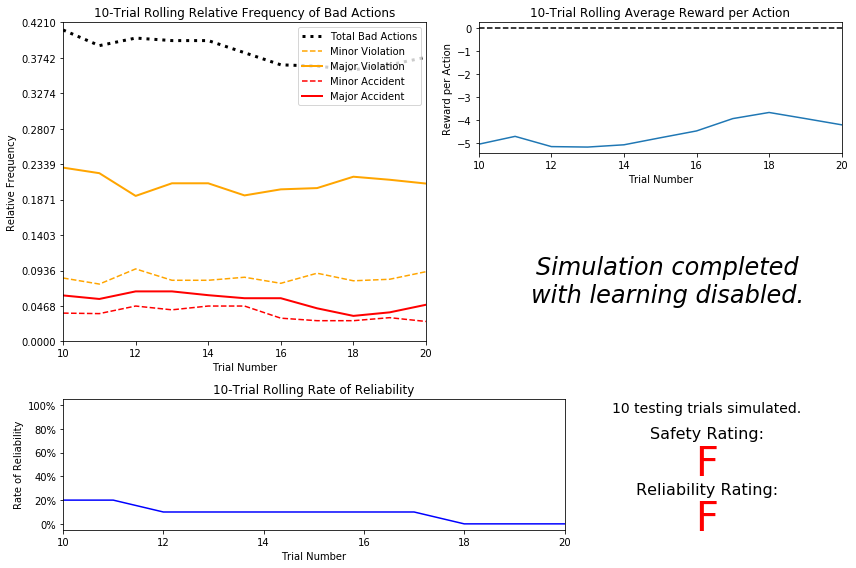

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**

>驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？

大概40%的不良决策由驾驶代理程序做出。10%的不良决策造成了事故，其中包括主要事故和小轻微事故

>假定代理程序是随机驾驶，那么可靠率是否合理？

可靠率合理,因为是随机驾驶而且是没有任何的学习。从"Rate of Reliability"图中可以看出,可靠性的最大值是  20%。显然，一点都不可靠。
 
>代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？

代理程序如果做出合理的决定，得到的是正面的奖励（加分）。如果是造成违规或产生事故的决定，等到的是惩罚（减分）。由于这个代理程序的决定是随机的，客观地说，这个代理程序的表现很差。观察"Reward per Action", 每个行动的平均得分小于-5，这表明了它收到严重的惩罚。

>随着试验数增加，结果输出是否有重大变化？

这个模型是随机的，而且是没有学习。增加试验的次数并不能对输出的结果有重大的变化。这一点从"Rate of Reliability"和"Reward per Action"两张图中可以看出来。

>这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？

这个智能出租车对于乘客来说是不安全的，系统对”Safty Rating"和“Reliability Rating"的评分均为F。没有人会认为一个不看交通灯行驶、随意打方向的出租车是安全的。

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**

 对于安全性和效率来说，最重要的是'waypoint'和'input':

* Input(light,right,left,oncoming）是很重要的，因为他关乎着智能出租车的安全。依靠这些输入的参数'light', 'right', 'left', 'oncoming'智能出租车才能安全地行驶。如果没有这些输入的参数，很容易造成交通事故。


* 'waypoint'对于效率来说是很重要的，因为他让智能出租车要到达目的地的正确方向。如果行驶的方向对了，对于效率的提升当然很有效。


单纯来看，deadline 确实体现了“告诉合理时间内还剩下多少动作数目”，那么看起来体现了时效性地信息。

但是首先这个时效性地信息是没有意义的，因为在每次训练过程中，起点、终点在随机变动，所以用它训练出来的 Q表在不同的环境下不具备泛化性，使用它反而会模糊小车的行动。（deadline在每次训练时候，值的分布都不同，那么一定程度上会干扰训练成果）

其次，它的值是5倍的小车与终点的曼哈顿距离，大概会将状态空间增加14倍（因为默认的地图尺寸是 6*8，1～6+8，共有14个取值），大幅增加状态空间的大小，导致小车很难训练。

最后，这个deadline 还有某种 “急于求成” 的意思，即便有意义，也会过分追求时间效率——而这一特征和安全性在某种程度上存在对立关系，也会引入一定的问题。

因此对于安全性和效率来说，不考虑此特征。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**

选择下面的元组：

* state = (waypoint, inputs['light'], inputs['left'],inputs['right'], inputs['oncoming'])

空间的大小是： 3 `*` 2 `*` 4 `*` 4 `*` 4 = 384

* waypoint 有3个值 ('forward', 'left', 'right')
       备注： 实际上，当 waypoint 取 None 的时候，就是针对于到终点的情况。而这是不需要考虑的。
       
* inputs['light'] 有2个值 ('red', 'green')
* inputs['left'] 有4个值 ('forward', 'left', 'right', None)
* inputs['left'] 有4个值 ('forward', 'left', 'right', None)
* inputs['oncoming'] 有4个值 ('forward', 'left', 'right', None	)

这些特征的总体组合有点大，因此驾驶代理程序需要大量的训练试验来学习策略。目前有20项训练试验（1 / 0.05 = 20详见问题6答案），可以增加训练试验次数或者减少状态的空间让驾驶代理程序学习这些策略轻松一些。


为什么我们这么强调对相同最大值的 action 的选择要随机呢？（Added by Reviewer)

如果总是挑选最大值，就等于是我们在对智能出租车的行为进行编程而不是让他去学习了。



In [4]:
import numpy as np
import random

def percent_visited(steps, states):
    visited = np.zeros(states, dtype = bool)
    for _ in range(steps):
        current_state = random.randint(0, states - 1)
        visited[current_state] = True
    return sum(visited)/float(states)

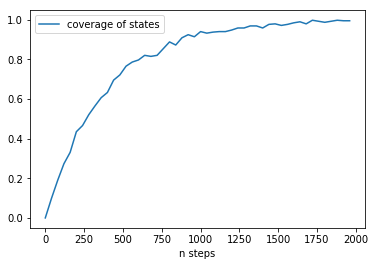

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

states = 384

n_steps = [s*40 for s in range(50)]
#n_steps = [s*50 for s in range(100)]
coverage = [percent_visited(steps, states) for steps in n_steps]
plt.plot(n_steps, coverage, label = 'coverage of states')
plt.xlabel('n steps')
plt.legend()

384种状态，驾驶代理程序大概需要2000 steps才能遍历一遍。

In [40]:
from sets import Set 
from random import choice

def chance_of_visiting_all_states(iterations, k, n=24):
    r = range(n)
    total = 0
    for i in range(iterations):
        s = Set()
        for j in range(k):
            s.add(choice(r))
            if len(s) == n:
                total +=1
                break
    return float(total)/iterations

#steps = 750
steps_attempt = [1000, 2000, 3000, 4000, 5000]
for steps in steps_attempt:
    print "Chance of visiting all states in {st} steps: {ch}"\
    .format (st = steps, ch = chance_of_visiting_all_states(2000, steps, 384))
#print chance_of_visiting_all_states(2000, steps, 384)

Chance of visiting all states in 1000 steps: 0.0
Chance of visiting all states in 2000 steps: 0.1245
Chance of visiting all states in 3000 steps: 0.874
Chance of visiting all states in 4000 steps: 0.99
Chance of visiting all states in 5000 steps: 0.999


通过上面的计算，大概需要5000次左右的训练试验。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

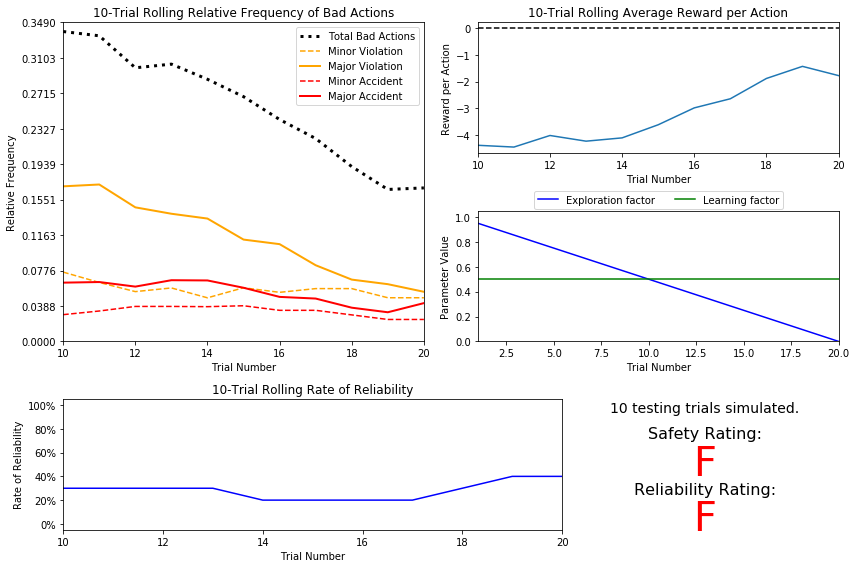

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**

>有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？

基本代理程序和默认Q-learning代理程序的安全等级和可靠性等级是相同的，并且这是仅有的两个类似的观察。其他的所有观察，如不良行为，主要和次要事故已经从先前的观察中减少。

>在测试之前驾驶代理大约需要做多少训练试验？在给定的 ϵ容忍度下，这个数字是否合理？

在测试之前，驾驶代理有20个训练试验。 这个数字是合理的。因为我们已将epilson从1降低到0.05，因此将试验的次数增加为1 / 0.05 = 20。

>你实现的 ϵ（探索因子）衰减函数是否准确地在参数面板中显示？

是的，它的正确实施。 因为我已经为每个试验实施了衰减功能

epilson = epilson - 0.05

因此这意味着我们的衰减因素在不断减少。 而上面的图表显示蓝线随着试验次数的增加而不断下降。

>随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？

是的，随着训练试验次数的增加，不良动作的数量正在减少，如上图中黑色虚线所示。 平均奖励正在增加。

>与初始的驾驶代理程序相比，安全性和可靠性评分怎样？

安全性和可靠性等级仍然与基本的驾驶代理程序相同。 这说明我们迄今为止所取得的进步并不足以将这个智能出租车应用到现实生活中，需要进一步的改进。


-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

In [21]:
import math
# \epsilon = e^{-at}, \textrm{for } 0 < a < 1 

print "It takes {:2.0f} training trials before begining testing. ".format(-math.log(0.005)/0.001)

It takes 5298 training trials before begining testing. 


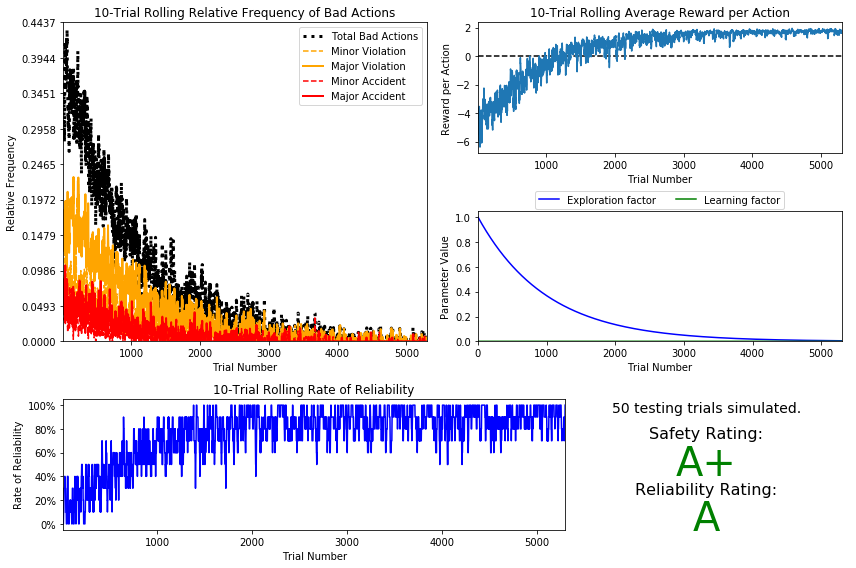

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

**回答：**

>使用了什么epsilon（探索因子）的衰减函数？

我尝试了几个调整参数的函最重要的是，它达到了安全评级A +和可靠性A，但最后决定使用上面提到的第三个衰减函数。 即 $$ \epsilon = e^{-at}，\textrm{for } 0 < a < 1 \ $$ ，因为它提供了良好的安全性和可靠性评级。

>在测试之前驾驶代理大约需要做多少训练试验？

在开始测试前大约有5000次试验。

>你用了什么epsilon-tolerance和alpha（学习率）值？为什么？

epsilon的值为1，tolerance为0.005，alpha为0.001。 我需要epsilon缓慢下降，所以alpha的值很小。 缓慢减少的epsilon将提供足够的训练。 从图中我们可以看到大约有5000次训练，可以实现最大的安全性和可靠性。 由于alpha非常小，tolerance也应该很小.

>与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？

跟之前的学习器相比，这个学习器改进的很多:

代理程序做出的不良的决定减少了很多；主要和次要事故几乎降至0；可靠率以及平均奖励增加；安全评级从F提升到A+, 可靠性从F提升到A。

>你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？

由于每次行动的回报在增加，而且安全性和可靠性的评级也有所提高，所以它驾驶代理程序已经成功学到了适当的策略。


>你对智能出租车的安全性和可靠性评分满意吗？

是的，我完全满意。

安全性：A +，由于安全等级非常高，这意味着智能卡可以避免所有可能的事故并且完全安全。

可靠性：A，它表明smartcab正准时达到90％以上。 这也是一个很好的效率。 因为有些时候交通的增加，甚至人类也无法按时到达目的地。

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** 

状态字典： state = (waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])


1）对于这个给定环境中的smartcab，最佳策略是首先查找路标的位置，然后查找红色或绿色指示灯。

   * 如果waypoint是前进：红灯，它应该等待；绿灯，它应该前进。
   * 如果waypoint是左转，红灯，则应始终选择“无”，即等待。
   * 如果waypoint是右转，如果没有来自左边的车辆，代理程序可以在红灯的情况下右转。

2）改进的Q学习算法的结果是:

* ('left', 'red', 'forward', None, 'forward')
 
-- forward : -0.48
 
-- right : -0.16
 
-- None : 0.29
 
-- left : -0.52

上例中的waypoint是左转的，信号是红色的。 因此，对于选择无动作，它被授予0.29，其他方向都是负面的奖励。 这是正确的遵循最佳策略。

* ('forward', 'red', 'forward', 'right', None)

-- forward : -0.16

-- right : 0.00

-- None : 0.08

-- left : 0.00

waypoint是前进的，信号是红色的。 因此，对于向前smartcab是负面奖励，而对于'None'，它是积极的奖励。
 
 根据上面第一段的叙述，这两个数据显示驾驶代理已经学会了最佳策略。
 
3）上述例子已经证明smartcab已经学会了最优策略。 这里是其他的例子:

* ('forward', 'green', 'left', 'left', 'forward')
 
-- forward : 0.10
 
-- right : 0.00
 
-- None : 0.00
 
-- left : 0.00

对于向前的waypoint和绿灯，驾驶代理程序向前进的方向是积极的奖励，并且其他任何方向都是不动的。

* ('left', 'red', 'forward', 'right', 'right')
 
-- forward : 0.00

-- right : 0.00
 
-- None : 0.01
 
-- left : -0.04

驾驶代理程序在红灯下获得了负面的奖励。


4）在这个例子中，从生成的文本文件中，smartcab并未遵循最佳策略:

* ('right', 'green', 'left', None, 'left')
 
-- forward : 0.01

-- right : 0.00

-- None : 0.07

-- left : 0.00

即使是绿灯且waypoint是右转，驾驶代理程序右转被授予0，前进被授予0.01。



-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**

**未来奖励项是什么：**

Source: https://en.wikipedia.org/w/index.php?title=Q-learning&action=edit&section=1

根据 Q-learning 的这个公式，公式中 gamma*maxQ 这一项是未来奖励。

$$\ Q(s_{t},a_{t})\leftarrow (1-\alpha )\cdot \underbrace {Q(s_{t},a_{t})} _{\rm {old~value}}+\underbrace {\alpha } _{\rm {learning~rate}}\cdot \overbrace {{\bigg (}\underbrace {r_{t}} _{\rm {reward}}+\underbrace {\gamma } _{\rm {discount~factor}}\cdot \underbrace {\max _{a}Q(s_{t+1},a)} _{\rm {estimate~of~optimal~future~value}}{\bigg )}} ^{\rm {learned~value}} $$

** 未来奖励项的作用是：**

与人做决策类比，当我们考虑一个决策时，不仅要考虑它短期内的奖励，而且要考虑它带来的长期奖励。
那么这边未来奖励项的目的，就是帮我们估计某一决策在在未来可能带来的收益。

** 未来奖励项不适用的原因：**

要考虑一个未来奖励项是否适用，最关键的一点是，在某一个状态执行动作后，其未来的状态和当前状态有没有一定的关系。

举个例子：

如一个走迷宫的项目，机器人的状态是走迷宫的坐标，那么当前状态和下一状态是存在概率关系的，那么通过未来奖励，就能够将终点处的正奖励扩散到正确路径上（因为在正确路径上会考虑未来的奖励，而正确路径由终点到起点的路径构成，那么终点的正奖励会逐步扩散到路径上的所有点）。


**关于智能出租车本身的特点 :**

对于这个项目，小车的状态是路口处小车的情况以及waypoint，除了waypoint之外的状态都是一个随机事件，后一个状态和前一个状态是没有关联的，所以这就导致未来奖励在项目中失效。

**关于环境的特点 :**

假设起点和终点是固定，那么未来奖励可以从终点扩散到起点。对于环境来说，每次训练或者测试，都会重新随机选择目的地和起点，那么就是说目的地和起点是不固定的，这样推算下来，未来奖励无法从终点扩散到起点。

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。